In [77]:
import random
from math import exp
import matplotlib.pyplot as plt
# process data label as 0, 1, 2 for training
def loadDataset(dataset): 
    newdata = []
    for x in range(len(dataset)-1):
        for i in range(0,len(dataset[x]),4):
            if dataset[x][i] == "I": # encounter labels, change it
                if dataset[x][-3:-1] == "sa": # Iris-setosa
                    newdata.append(0)
                elif dataset[x][-2:-1] == "r": # Iris-versicolor
                    newdata.append(1)
                elif dataset[x][-3:-1] == "ca": # Iris-virginica
                    newdata.append(2) 
                break
            else:
                attribute = float(dataset[x][i:i+3])
                newdata.append(attribute)
        trainingSet.append(newdata)       
        newdata = [] # clear the package
    return trainingSet

# find the range of data to do normalize
def dataset_minmax(dataset): # zip a(1,2,3) , b(4,5,6) to [(1,4), (2,5), (3,6)] 
    minmax = list()
    stats = [[min(column), max(column)] for column in zip(*dataset)] # unzip the file
    return stats

# rescale data to range 0~1
def normalize_data(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# transfer neuron activation 
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

#forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs # keep updating the neurons
    return inputs

# backpropagate error and sotre in neurons
def backward_propagate_error(network, expected): 
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)): # hidden
                error = 0.0
                for neuron in network[i+1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error) 
        else:
            for j in range(len(layer)): # output
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# update network weights with error
def update_weights(network, row, learning_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i-1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += learning_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += learning_rate * neuron['delta']

def train_network(network, train, learning_rate, n_epoch, n_outputs):
    SE = []
    EPOCH = [i for i in range(n_epoch)]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1 # one hot encoding !!!
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, learning_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, learning_rate, sum_error))
        SE.append(sum_error)

    plt.plot(EPOCH, SE, 'r--')
    plt.show()


def init_network(n_inputs, n_hidden, n_outputs): 
# create n_hidden neurons and each neuron in the hidden layer has n_inputs + 1 weights
    network = list()
    hidden_layer1 = [{'weights': [(random.random()-0.5)/5.0 for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer1) # 4 neurons with 4 input weights plus the bias
    hidden_layer2 = [{'weights': [(random.random()-0.5)/5.0 for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer2)
    #for layer in network:
        #print(layer)
    output_layer = [{'weights': [(random.random()-0.5)/5.0 for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    #print("out",hidden_layer)
    network.append(output_layer) # 3 neurons with 4 input weights plus the bias
    #for layer in network:
     #   print(layer)
    return network

# make a prediction with a network
# It returns the index in the network output that has the largest probability. 
# Assuming that class values have been converted to integers starting at 0. [0,1,2]
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

# backpropagation with stochastic gradient descent
def back_propagate(train, learning_rate, n_epoch, n_hidden):
    n_inputs = len(train[0]) - 1
    n_outputs = len(set([row[-1] for row in train]))
    network = init_network(n_inputs, n_hidden, n_outputs)
    train_network(network, train, learning_rate, n_epoch, n_outputs)
    

In [78]:
trainingSet=[]
testSet=[]

f = open('iris.data.txt', "r")
lines = f.readlines()
dataset = list(lines)
trainingSet = loadDataset(dataset)

>epoch=0, lrate=0.100, error=92.959
>epoch=1, lrate=0.100, error=95.467
>epoch=2, lrate=0.100, error=96.724
>epoch=3, lrate=0.100, error=97.036
>epoch=4, lrate=0.100, error=97.122
>epoch=5, lrate=0.100, error=97.156
>epoch=6, lrate=0.100, error=97.177
>epoch=7, lrate=0.100, error=97.194
>epoch=8, lrate=0.100, error=97.211
>epoch=9, lrate=0.100, error=97.228
>epoch=10, lrate=0.100, error=97.244
>epoch=11, lrate=0.100, error=97.261
>epoch=12, lrate=0.100, error=97.277
>epoch=13, lrate=0.100, error=97.293
>epoch=14, lrate=0.100, error=97.309
>epoch=15, lrate=0.100, error=97.325
>epoch=16, lrate=0.100, error=97.341
>epoch=17, lrate=0.100, error=97.356
>epoch=18, lrate=0.100, error=97.372
>epoch=19, lrate=0.100, error=97.387
>epoch=20, lrate=0.100, error=97.402
>epoch=21, lrate=0.100, error=97.418
>epoch=22, lrate=0.100, error=97.433
>epoch=23, lrate=0.100, error=97.447
>epoch=24, lrate=0.100, error=97.462
>epoch=25, lrate=0.100, error=97.477
>epoch=26, lrate=0.100, error=97.492
>epoch=27, 

>epoch=228, lrate=0.100, error=98.879
>epoch=229, lrate=0.100, error=98.877
>epoch=230, lrate=0.100, error=98.874
>epoch=231, lrate=0.100, error=98.870
>epoch=232, lrate=0.100, error=98.867
>epoch=233, lrate=0.100, error=98.862
>epoch=234, lrate=0.100, error=98.857
>epoch=235, lrate=0.100, error=98.851
>epoch=236, lrate=0.100, error=98.844
>epoch=237, lrate=0.100, error=98.837
>epoch=238, lrate=0.100, error=98.828
>epoch=239, lrate=0.100, error=98.819
>epoch=240, lrate=0.100, error=98.808
>epoch=241, lrate=0.100, error=98.796
>epoch=242, lrate=0.100, error=98.783
>epoch=243, lrate=0.100, error=98.769
>epoch=244, lrate=0.100, error=98.752
>epoch=245, lrate=0.100, error=98.734
>epoch=246, lrate=0.100, error=98.714
>epoch=247, lrate=0.100, error=98.692
>epoch=248, lrate=0.100, error=98.667
>epoch=249, lrate=0.100, error=98.640
>epoch=250, lrate=0.100, error=98.610
>epoch=251, lrate=0.100, error=98.577
>epoch=252, lrate=0.100, error=98.541
>epoch=253, lrate=0.100, error=98.500
>epoch=254, 

>epoch=445, lrate=0.100, error=5.222
>epoch=446, lrate=0.100, error=5.194
>epoch=447, lrate=0.100, error=5.166
>epoch=448, lrate=0.100, error=5.139
>epoch=449, lrate=0.100, error=5.113
>epoch=450, lrate=0.100, error=5.087
>epoch=451, lrate=0.100, error=5.063
>epoch=452, lrate=0.100, error=5.039
>epoch=453, lrate=0.100, error=5.016
>epoch=454, lrate=0.100, error=4.993
>epoch=455, lrate=0.100, error=4.972
>epoch=456, lrate=0.100, error=4.950
>epoch=457, lrate=0.100, error=4.930
>epoch=458, lrate=0.100, error=4.910
>epoch=459, lrate=0.100, error=4.891
>epoch=460, lrate=0.100, error=4.872
>epoch=461, lrate=0.100, error=4.854
>epoch=462, lrate=0.100, error=4.836
>epoch=463, lrate=0.100, error=4.819
>epoch=464, lrate=0.100, error=4.802
>epoch=465, lrate=0.100, error=4.786
>epoch=466, lrate=0.100, error=4.771
>epoch=467, lrate=0.100, error=4.756
>epoch=468, lrate=0.100, error=4.741
>epoch=469, lrate=0.100, error=4.727
>epoch=470, lrate=0.100, error=4.713
>epoch=471, lrate=0.100, error=4.699
>

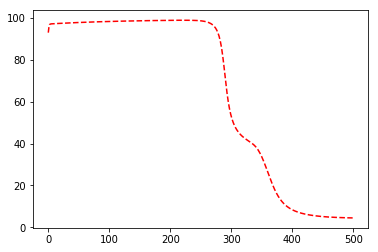

In [79]:
# normalize inputs

minmax = dataset_minmax(trainingSet)
normalize_data(trainingSet, minmax)

learning_rate = 0.1
n_epoch = 500
n_hidden = 4 # neuron per layer

back_propagate(trainingSet, learning_rate, n_epoch, n_hidden)